<a href="https://colab.research.google.com/github/Venne-glitch/Software_Engineering_Lab/blob/main/Weather_Model(Iterative_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted temperatures for the next 7 days: [36.13333333333333, 36.45833333333333, 36.78333333333333, 37.108333333333334, 37.43333333333334, 37.75833333333334, 38.08333333333334]


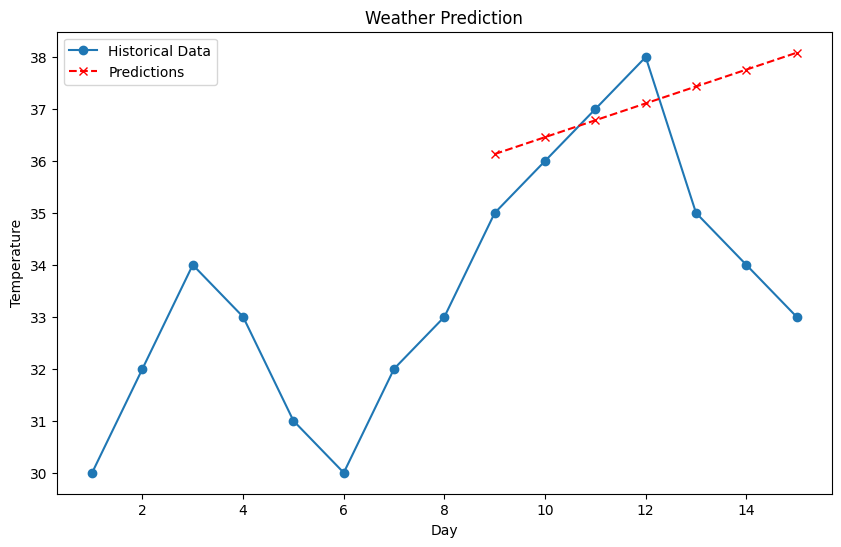

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample weather data (days, temperature)
# In real scenarios, this data would be historical weather data
weather_data = {
    "Day": np.arange(1, 16),
    "Temperature": [30, 32, 34, 33, 31, 30, 32, 33, 35, 36, 37, 38, 35, 34, 33]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(weather_data)

# Function to iteratively predict weather (temperature in this case)
def iterative_weather_prediction(days_to_predict, df):
    # Extracting features (day) and target (temperature)
    X = df["Day"].values.reshape(-1, 1)  # Features (Day)
    y = df["Temperature"].values  # Target (Temperature)

    model = LinearRegression()
    predictions = []

    for i in range(days_to_predict):
        # Train the model on existing data
        model.fit(X, y)

        # Predict temperature for the next day
        next_day = np.array([[df["Day"].max() + 1]])
        predicted_temp = model.predict(next_day)[0]

        # Append prediction
        predictions.append(predicted_temp)

        # Update the dataframe with the new day and predicted temperature
        new_data = pd.DataFrame({"Day": [next_day[0][0]], "Temperature": [predicted_temp]})
        df = pd.concat([df, new_data], ignore_index=True)

        # Update X and y to include new data
        X = df["Day"].values.reshape(-1, 1)
        y = df["Temperature"].values

    return df, predictions

# Predict for the next 7 days
days_to_predict = 7
updated_df, predictions = iterative_weather_prediction(days_to_predict, df)

# Display predictions
print("Predicted temperatures for the next 7 days:", predictions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df["Day"], df["Temperature"], label="Historical Data", marker='o')
predicted_days = np.arange(df["Day"].max() - days_to_predict + 1, df["Day"].max() + 1)
plt.plot(predicted_days, predictions, label="Predictions", marker='x', linestyle='--', color='red')
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Weather Prediction")
plt.legend()
plt.show()

